In [1]:
import numpy as np

In [2]:
positions_30s = np.loadtxt('coords_30p0s_03_10.txt')
positions_32p5s = np.loadtxt('coords_32p5s_03_10.txt')
#positions_30s = np.loadtxt('coords_30p0s_01_3160.txt')
#positions_32p5s = np.loadtxt('coords_32p5s_01_3160.txt')
#positions_30s = np.loadtxt('coords_30p0s_10_17332.txt')
#positions_32p5s = np.loadtxt('coords_32p5s_10_17332.txt')
print(type(positions_30s))
print(np.shape(positions_30s))
print(positions_30s.dtype)

<class 'numpy.ndarray'>
(10, 3)
float64


In [3]:
# compute distacnce of particles between two datasets

def calc_phi_ij(coords_n, coords_n_minus_1):
    num_particles = np.shape(coords_n)[0]
    print('Compute distance function of {} particles'.format(num_particles))
    phi_ij = np.zeros((num_particles, num_particles))
    for i in range(3): # loop over x,y,z
        phi_ij += np.square(np.subtract.outer(coords_n[:,i], coords_n_minus_1[:,i]))
    phi_ij = np.sqrt(phi_ij)
    #print(phi_ij)
    return(phi_ij)

In [4]:
distances = calc_phi_ij(positions_30s, positions_32p5s)
displacements = positions_32p5s - positions_30s

Compute distance function of 10 particles


In [5]:
import scipy as scipy

In [6]:
row_ind, col_ind = scipy.optimize.linear_sum_assignment(distances)
error = np.sum(distances[row_ind, col_ind])
print(row_ind)
print(col_ind)
print(error)
assignment_diff = positions_30s[col_ind] - positions_32p5s[row_ind]


[0 1 2 3 4 5 6 7 8 9]
[9 8 2 3 6 1 7 4 0 5]
0.12134994340482899


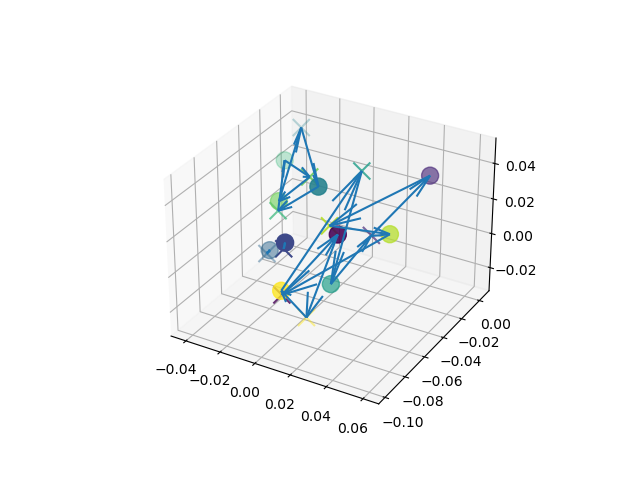

In [7]:
import matplotlib.pyplot as plt
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.scatter(particles_coords[10,:,0], particles_coords[10,:,1], particles_coords[10,:,2])
#colors = np.zeros_like(positions_30s[:,0])
#colors[np.where(positions_30s[:,0]>0)]=1
#c=colors
colors = np.linspace(0,1,np.shape(positions_30s)[0])
ax.scatter(positions_30s[:,0], positions_30s[:,1], positions_30s[:,2], s=150, marker="x", c=colors)
ax.scatter(positions_32p5s[:,0], positions_32p5s[:,1], positions_32p5s[:,2], s=150, c=colors)
ax.quiver(positions_30s[:,0], positions_30s[:,1], positions_30s[:,2], displacements[:,0], displacements[:,1], displacements[:,2])
ax.quiver(positions_32p5s[:,0], positions_32p5s[:,1], positions_32p5s[:,2], assignment_diff[:,0], assignment_diff[:,1], assignment_diff[:,2])

ax.set_aspect('equal')